In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 
# for saving model
import joblib
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.preprocessing import LabelEncoder,OneHotEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import classification_report, accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# allows to apply data preparation transforms to different columns in dataset
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
# evaluating model
import shap
from lime.lime_tabular import LimeTabularExplainer
from lime import lime_tabular

import warnings
warnings.filterwarnings("ignore")

In [5]:
df=pd.read_csv('dataset/loan_data.csv')
df.head()
# here loan status = 1 is approvied
# and loan status = 0 is not rejected

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [6]:
# column names
print(df.columns)
# dataypes of each column
print(df.dtypes)
# checking any null values
df.isnull().sum()


Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')
person_age                        float64
person_gender                      object
person_education                   object
person_income                     float64
person_emp_exp                      int64
person_home_ownership              object
loan_amnt                         float64
loan_intent                        object
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length        float64
credit_score                        int64
previous_loan_defaults_on_file     object
loan_status                         int64
dtype: object


person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [7]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [8]:
df.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [9]:
# 
print(df.describe())

         person_age  person_income  person_emp_exp     loan_amnt  \
count  45000.000000   4.500000e+04    45000.000000  45000.000000   
mean      27.764178   8.031905e+04        5.410333   9583.157556   
std        6.045108   8.042250e+04        6.063532   6314.886691   
min       20.000000   8.000000e+03        0.000000    500.000000   
25%       24.000000   4.720400e+04        1.000000   5000.000000   
50%       26.000000   6.704800e+04        4.000000   8000.000000   
75%       30.000000   9.578925e+04        8.000000  12237.250000   
max      144.000000   7.200766e+06      125.000000  35000.000000   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
count   45000.000000         45000.000000                45000.000000   
mean       11.006606             0.139725                    5.867489   
std         2.978808             0.087212                    3.879702   
min         5.420000             0.000000                    2.000000   
25%         8.590000  

## Visualising outlier

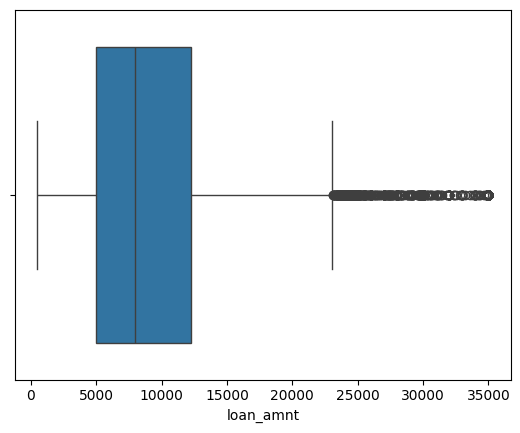

In [10]:
# outliers in target variable
sns.boxplot(x=df['loan_amnt'])
plt.show()

## Feature exploration

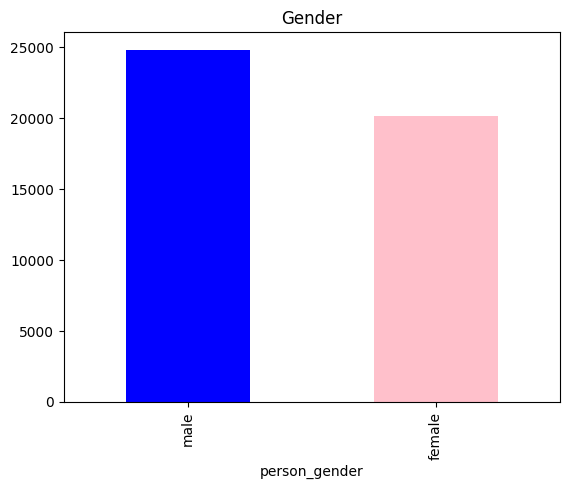

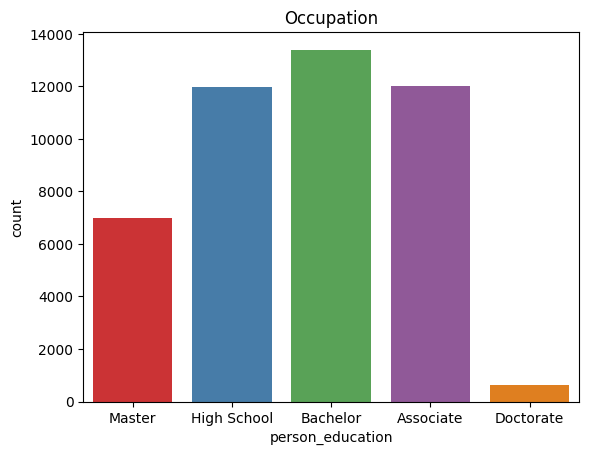

In [11]:
# categorical feaeture
df['person_gender'].value_counts().plot(kind='bar',color={'Blue','Pink'})
                                        
plt.title('Gender')
plt.plot(8,8)

plt.show()

sns.countplot(df,x='person_education',palette='Set1')
plt.title('Occupation')
plt.show()

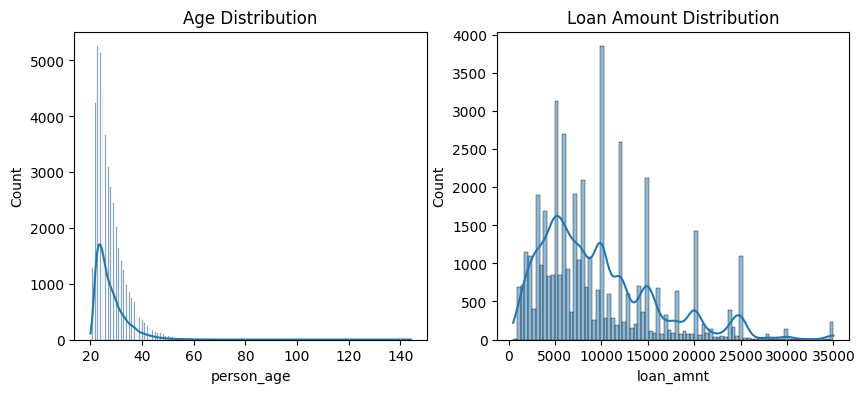

In [12]:
# numerical feature distribution
fig,ax=plt.subplots(1,2,figsize=(10,4))

sns.histplot(df['person_age'],kde=True,ax=ax[0])
ax[0].set_title('Age Distribution')
# plt.show()

sns.histplot(df['loan_amnt'],kde=True,ax=ax[1])
ax[1].set_title('Loan Amount Distribution')
# plt.show()

plt.show()

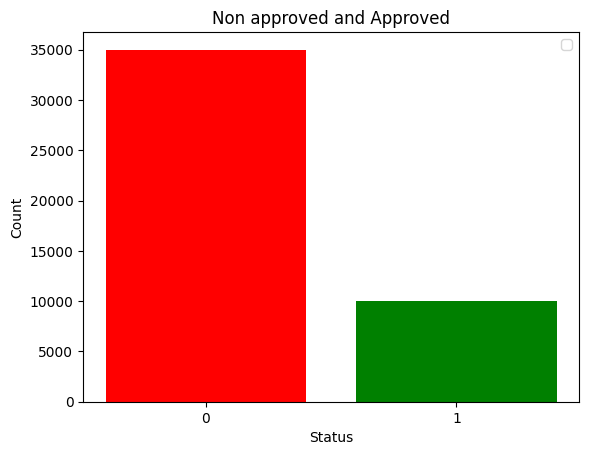

In [13]:
import matplotlib.pyplot as plt

# Count occurrences of 1 and 0 in the 'status' column
status_counts = df['loan_status'].value_counts()

# Create a bar plot
plt.bar(status_counts.index, status_counts.values, color=['red', 'green'])

# Set labels and title
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Non approved and Approved')
plt.legend()
# Display the plot
plt.xticks([0, 1], ['0', '1'])
plt.show()


In [14]:
df.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

<Axes: >

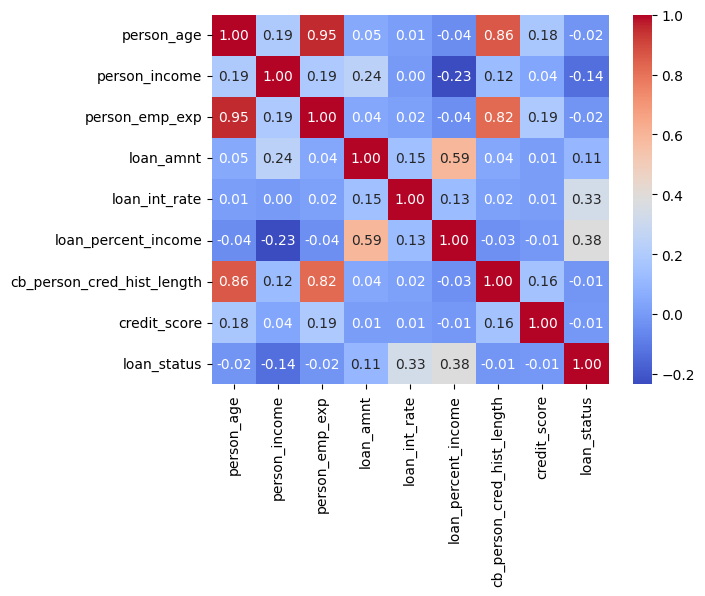

In [15]:
columns=['person_age','person_income','person_emp_exp','loan_amnt','loan_int_rate','loan_percent_income','cb_person_cred_hist_length','credit_score','loan_status']
correlation=df[columns].corr()
sns.heatmap(correlation,annot=True,cmap='coolwarm',fmt=".2f")
# highly related columns are person_emp_exp & person_age, person_age & cb_person_cred_hist_length 

In [16]:
# Count occurrences of 1 and 0 in the 'status' column
status_counts = df['loan_status'].value_counts()

# Print the result
print(status_counts)


loan_status
0    35000
1    10000
Name: count, dtype: int64


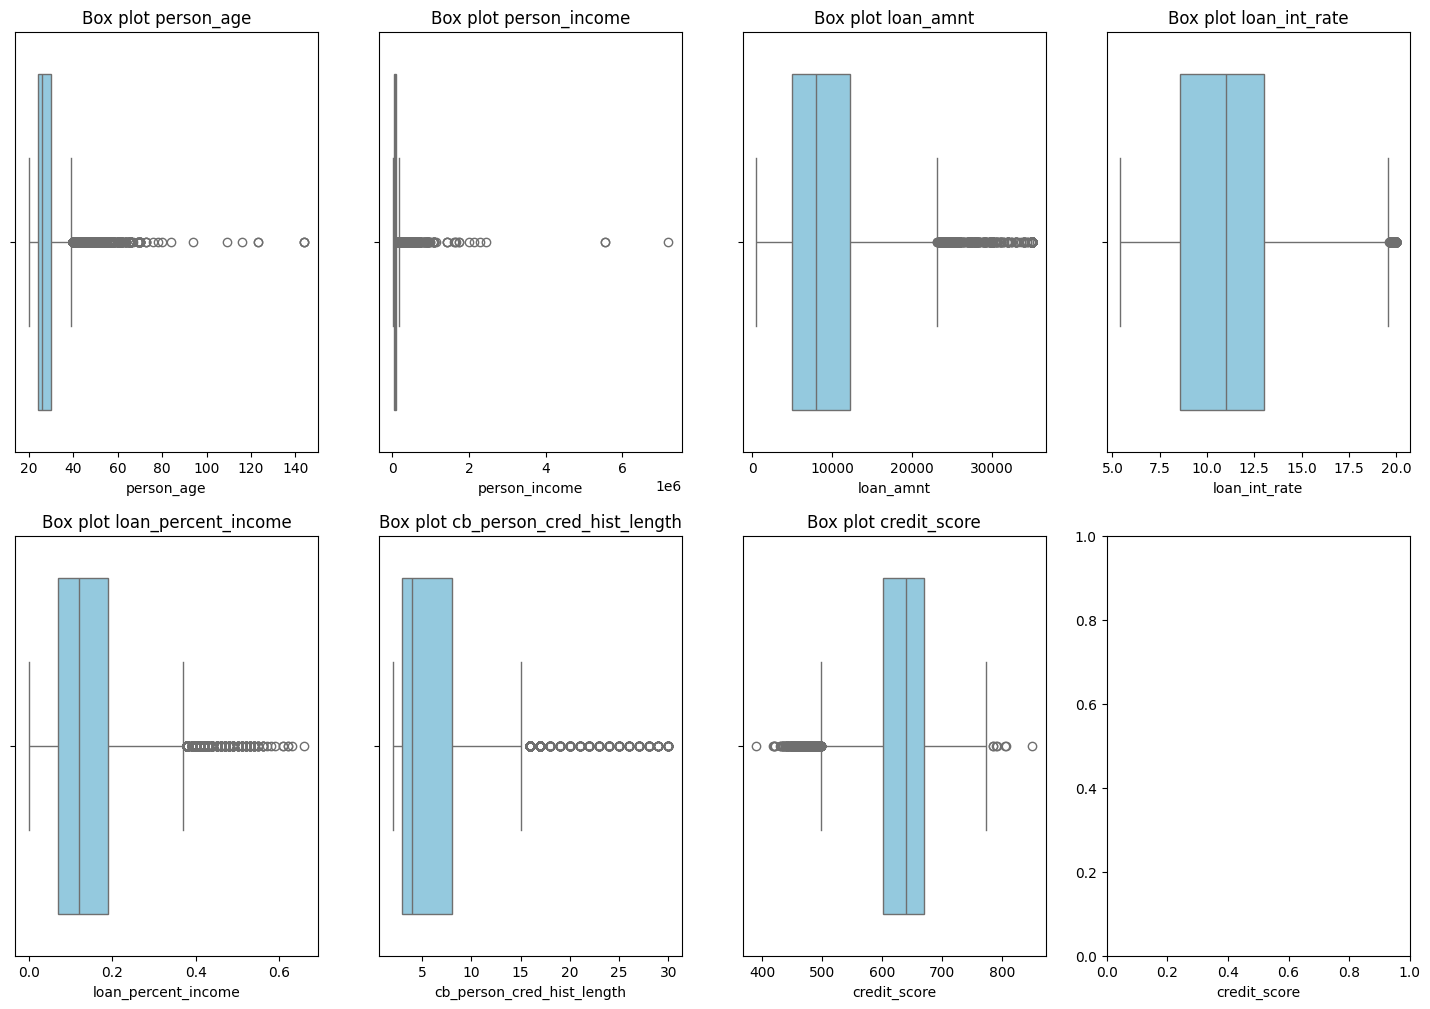

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# numerical cols
num_cols = ['person_age', 'person_income', 'loan_amnt', 'loan_int_rate', 
                     'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']

fig,ax=plt.subplots(2,4,figsize=(18,12))
ax=ax.flatten()
for i,column in enumerate(num_cols):
 
    sns.boxplot(x=df[column], color='skyblue',ax=ax[i])
    ax[i].set_title(f'Box plot {column}')
    plt.xlabel(column)

plt.show()


In [18]:
# we DON'T normalize the data when we are using the model like: RANDOM FOREST & GRADIENT BOOSTING
# we USE it where are using models like: LINEAR MODELS (LOGISTIC REGRESSION), SVM (SUPPORT VECTOR MACHINE), KNN (K NEAREST NEIGHTBORS) 

## Replacing the outlier of the age

In [19]:
# replacin the outtlier
df['person_age'].unique(
)

array([ 22.,  21.,  25.,  23.,  24.,  26., 144., 123.,  20.,  32.,  34.,
        29.,  33.,  28.,  35.,  31.,  27.,  30.,  36.,  40.,  50.,  45.,
        37.,  39.,  44.,  43.,  41.,  46.,  38.,  47.,  42.,  48.,  49.,
        58.,  65.,  51.,  53.,  66.,  61.,  54.,  57.,  59.,  62.,  60.,
        55.,  52.,  64.,  70.,  78.,  69.,  56.,  73.,  63.,  94.,  80.,
        84.,  76.,  67., 116., 109.])

In [20]:
df['person_age'].describe()

count    45000.000000
mean        27.764178
std          6.045108
min         20.000000
25%         24.000000
50%         26.000000
75%         30.000000
max        144.000000
Name: person_age, dtype: float64

In [21]:
from sklearn.impute import KNNImputer

# KNN imputer
knn = KNNImputer(n_neighbors=5)

df['person_age'] = knn.fit_transform(df[['person_age']])

df['person_age'].unique()


array([ 22.,  21.,  25.,  23.,  24.,  26., 144., 123.,  20.,  32.,  34.,
        29.,  33.,  28.,  35.,  31.,  27.,  30.,  36.,  40.,  50.,  45.,
        37.,  39.,  44.,  43.,  41.,  46.,  38.,  47.,  42.,  48.,  49.,
        58.,  65.,  51.,  53.,  66.,  61.,  54.,  57.,  59.,  62.,  60.,
        55.,  52.,  64.,  70.,  78.,  69.,  56.,  73.,  63.,  94.,  80.,
        84.,  76.,  67., 116., 109.])

In [22]:
df.iloc[1800]

person_age                             23.0
person_gender                        female
person_education                   Bachelor
person_income                       29741.0
person_emp_exp                            0
person_home_ownership                  RENT
loan_amnt                            2000.0
loan_intent                       EDUCATION
loan_int_rate                         14.35
loan_percent_income                    0.07
cb_person_cred_hist_length              2.0
credit_score                            588
previous_loan_defaults_on_file           No
loan_status                               0
Name: 1800, dtype: object

## Normalizing

In [23]:
from sklearn.preprocessing import MinMaxScaler

# normalizing the dataframe [0,1]
scaler = MinMaxScaler()
normalizedf = df.copy()  
normalizedf[num_cols] = scaler.fit_transform(df[num_cols])

# Now you can create scatter plots using the normalized data


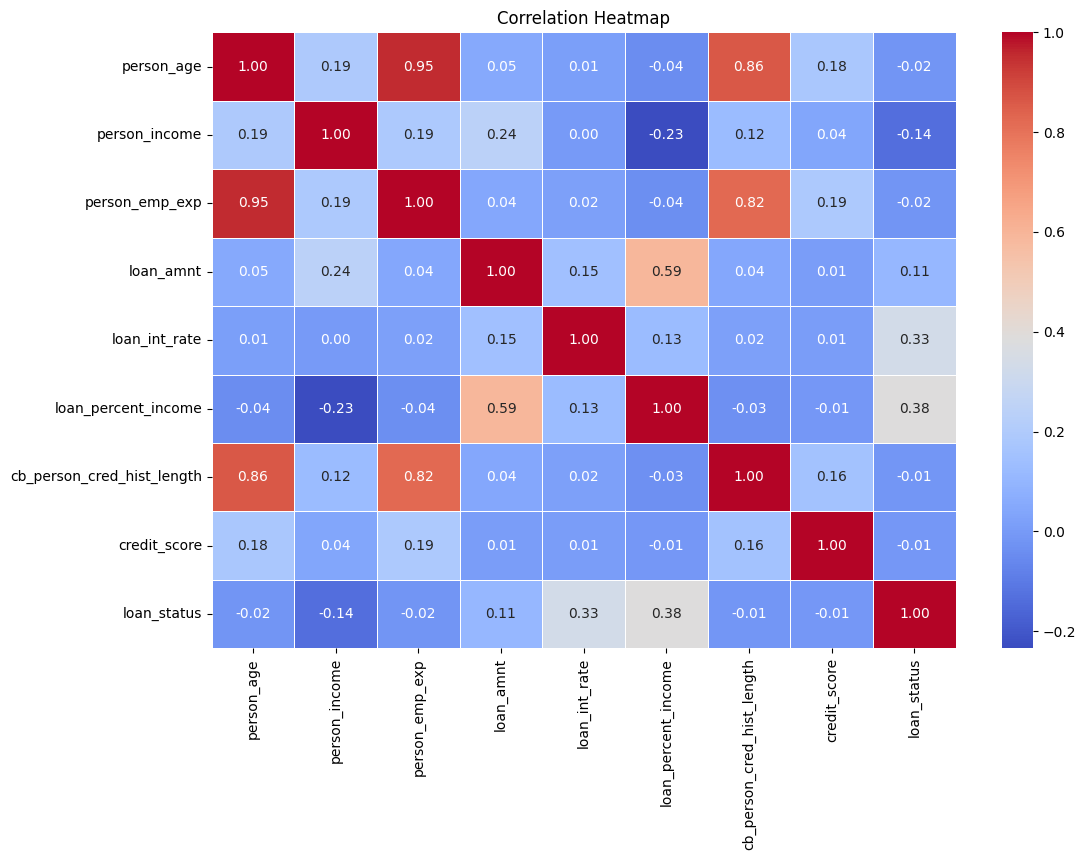

In [24]:
# correlation of the normalized data 
columns=['person_age','person_income','person_emp_exp','loan_amnt','loan_int_rate','loan_percent_income','cb_person_cred_hist_length','credit_score','loan_status']
corr_matrix = normalizedf[columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


## Train and Test Split

In [22]:
# in our dataset the columns like person_gender, previous_loan_defaults_on_file, one hot encoding
# label encoding can be done when the column follows the specific order, where there is ranking. (e.g. masters is not greater than bachelor which would make sense to the model).
# allows to apply data preparation transforms to different columns in dataset

In [23]:

# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline

# # dropping the target column
# X=df.drop(columns=['loan_status'])
# # target column
# y=df['loan_status']
# # train test split
# X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

# # ---------------------One hot encoding----------------------------
# # one hot encoding
# oneHotCols=['person_gender', 'person_education', 'person_home_ownership', 'loan_intent','previous_loan_defaults_on_file']

# preprocessor = ColumnTransformer(
#     transformers=[
#         # label, applying onehot encoding
#         ('onehot', OneHotEncoder(drop='first'), oneHotCols),  # drop='first' to avoid multicollinearity (optional)
#         ('standardscalar',StandardScaler(),standardcols)
#     ],
#     remainder='passthrough'  # this will ignore the numerical columns in the dataset
# )
# # chain multiple processing steps (training model or transformation)
# pipeline = Pipeline(steps=[
#     # label
#     ('preprocessor', preprocessor),
#     ('params',RandomForestClassifier(random_state=42))
# ])
# # X_train_transformed = preprocessor.fit_transform(X_train)
# # X_traindf = pd.DataFrame(X_train_transformed, columns=pipeline.named_steps['preprocessor'].get_feature_names_out())

# # X_traindf


# X_train_transformed = preprocessor.fit_transform(X_train)
# X_test_transformed = preprocessor.transform(X_test)

In [ ]:
# we first split the data into train test split, so that we can further do one hot encoding and label encoding. This avoids the data leakage because encoder will see the entire dataset


## Using Random Forest Classifier

In [25]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# allows to apply data preparation transforms to different columns in dataset
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# dropping the target column
X=df.drop(columns=['loan_status'])
# target column
y=df['loan_status']
# train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

# ---------------------One hot encoding----------------------------
# one hot encoding
oneHotCols=['person_gender', 'person_education', 'person_home_ownership', 'loan_intent','previous_loan_defaults_on_file']

# preprocessor = ColumnTransformer(
#     transformers=[
#         # label, applying onehot encoding
#         ('onehot', OneHotEncoder(drop='first'), oneHotCols),  # drop='first' to avoid multicollinearity (optional)
#     ],
#     remainder='passthrough'  # this will ignore the numerical columns in the dataset
# )
# # chain multiple processing steps (training model or transformation)
# pipeline = Pipeline(steps=[
#     # label
#     ('preprocessor', preprocessor)
# ])
# ------------------------------------------------------------------
# ----------------standard scalar----------------------------
standardcols=['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 
    'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']

preprocessor = ColumnTransformer(
    transformers=[
        # label, applying onehot encoding
        ('onehot', OneHotEncoder(drop='first'), oneHotCols),  # drop='first' to avoid multicollinearity (optional)
        ('standardscalar',StandardScaler(),standardcols)
    ],
    remainder='passthrough'  # this will ignore the numerical columns in the dataset
)
# chain multiple processing steps (training model or transformation)
pipeline = Pipeline(steps=[
    # label
    ('preprocessor', preprocessor),
    ('params',RandomForestClassifier(random_state=42))
])

# -------------------------------------------------------

# hyperaparameter tuning
paramgrid={
    'params__n_estimators': [100, 200, 300],
    'params__max_depth': [None, 10, 20, 30],
    'params__min_samples_split': [2, 5, 10],
}
gridsearchRF=GridSearchCV(pipeline,param_grid=paramgrid,cv=5,n_jobs=-1,verbose=2)
gridsearchRF.fit(X_train,y_train)

print(f"Best Hyperparameters: {gridsearchRF.best_params_}")
print(f"Best Cross-Validation Score: {gridsearchRF.best_score_}")

# -------------------------------------------------------

# The predict method uses the best_estimator_ from the GridSearchCV object, which contains the complete pipeline (including both preprocessing steps and the trained model).
# The ColumnTransformer in the pipeline automatically transforms X_test (just like X_train during training) before passing it to the model for prediction.
bestmodel = gridsearchRF.best_estimator_
ypred=bestmodel.predict(X_test)

# ---------------------------------
# saving the model
joblib.dump(bestmodel, 'RandomForest_model.pkl')

print("Accuracy:", accuracy_score(y_test, ypred))  # accuracy
print("Classification Report:")
print(classification_report(y_test, ypred))  # precision, recall and f1score

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Hyperparameters: {'params__max_depth': 30, 'params__min_samples_split': 2, 'params__n_estimators': 300}
Best Cross-Validation Score: 0.9268888888888889
Accuracy: 0.9268888888888889
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     10493
           1       0.89      0.77      0.82      3007

    accuracy                           0.93     13500
   macro avg       0.91      0.87      0.89     13500
weighted avg       0.93      0.93      0.93     13500



In [ ]:
# this is how the transformed data looks like

# fit preprocessor on the train data
preprocessor.fit(X_train)
# tranformation to train data
X_train_transformed = preprocessor.transform(X_train)

# one hot encoded columns
onehot_columns = preprocessor.transformers_[0][1].get_feature_names_out(oneHotCols)

# combining all cols
all_columns = list(onehot_columns) + standardcols

X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=all_columns)
X_train_transformed_df


,person_gender_male,person_education_Bachelor,person_education_Doctorate,person_education_High School,person_education_Master,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,...,loan_intent_VENTURE,previous_loan_defaults_on_file_Yes,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.705707,-0.440048,1.429362,-0.605397,0.005560,0.005674,2.631256,0.286161
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,-0.623916,-0.592189,-0.396412,-0.406906,-0.125108,1.271709,-0.739057,0.326048
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.041690,-0.191003,-0.230432,-0.406906,1.764548,-0.339608,-0.220548,-0.132652
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.291113,0.125583,-0.396412,-1.327904,-0.249075,-1.490548,-0.998312,0.585314
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,-0.956720,-0.575341,-0.894350,0.069473,0.005560,2.307555,-0.739057,0.006952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31495,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,-0.291113,0.087129,0.101527,0.168718,-1.662966,-0.224514,-0.479803,-1.468866
31496,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,-0.457515,-0.516608,-0.396412,-0.585389,0.233391,0.350956,-0.479803,0.286161
31497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.873699,-0.251793,0.599465,0.181739,-0.084903,0.466050,0.816472,0.385879
31498,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,-0.291113,1.101071,0.101527,1.657401,2.344176,-0.339608,-0.739057,-0.571409


## Using gradient boosting

In [ ]:

# allows to apply data preparation transforms to different columns in dataset
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# dropping the target column
X=df.drop(columns=['loan_status'])
# target column
y=df['loan_status']
# train test split
X_train,X_test,y_train,y_tests=train_test_split(X,y,test_size=0.3,random_state=42)

# ---------------------One hot encoding----------------------------
# one hot encoding
oneHotCols=['person_gender', 'person_education', 'person_home_ownership', 'loan_intent','previous_loan_defaults_on_file']


# ----------------standard scalar----------------------------
standardcols=['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 
    'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']

preprocessor = ColumnTransformer(
    transformers=[
        # label, applying onehot encoding
        ('onehot', OneHotEncoder(drop='first'), oneHotCols),  # drop='first' to avoid multicollinearity (optional)
        ('standardscalar',StandardScaler(),standardcols)
    ],
    remainder='passthrough'  # this will ignore the numerical columns in the dataset
)
# chain multiple processing steps (training model or transformation)
pipeline = Pipeline(steps=[
    # label
    ('preprocessor', preprocessor),
    ('params',GradientBoostingClassifier(random_state=42))
])

# -------------------------------------------------------

# hyperaparameter tuning
paramgrid={
    'params__n_estimators': [100, 200, 300],
    'params__max_depth': [10, 20],
    'params__min_samples_split': [2, 5],
    'params__learning_rate':[0.01,0.1]
}
gridsearch=GridSearchCV(pipeline,param_grid=paramgrid,cv=5,n_jobs=-1,verbose=2)
gridsearch.fit(X_train,y_train)

print(f"Best Hyperparameters: {gridsearch.best_params_}")
print(f"Best Cross-Validation Score: {gridsearch.best_score_}")

# -------------------------------------------------------

# evaluate the model on the test set
bestmodel = gridsearch.best_estimator_
ypred=bestmodel.predict(X_test)
# ---------------------------------
# saving model
joblib.dump(bestmodel, 'GradientBoosting_model.pkl')

print("Accuracy:", accuracy_score(y_tests, ypred))  # accuracy
print("Classification Report:")
print(classification_report(y_tests, ypred))  # precision, recall and f1score

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Hyperparameters: {'params__learning_rate': 0.1, 'params__max_depth': 10, 'params__min_samples_split': 2, 'params__n_estimators': 200}
Best Cross-Validation Score: 0.9340952380952381
Accuracy: 0.9331111111111111
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     10493
           1       0.88      0.81      0.84      3007

    accuracy                           0.93     13500
   macro avg       0.91      0.89      0.90     13500
weighted avg       0.93      0.93      0.93     13500



## Plotting ROC Curve

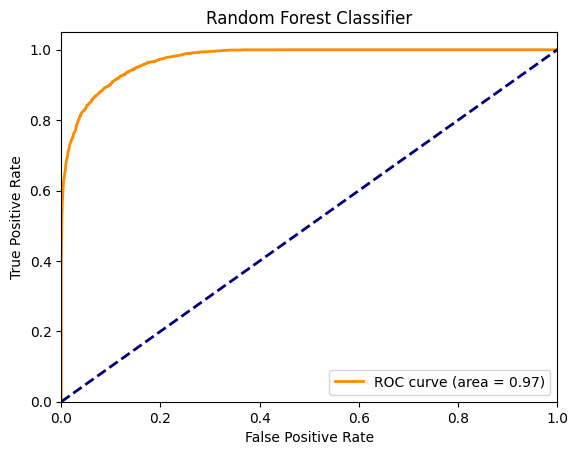

In [33]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, bestmodel.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classifier')
plt.legend(loc='lower right')
plt.show()


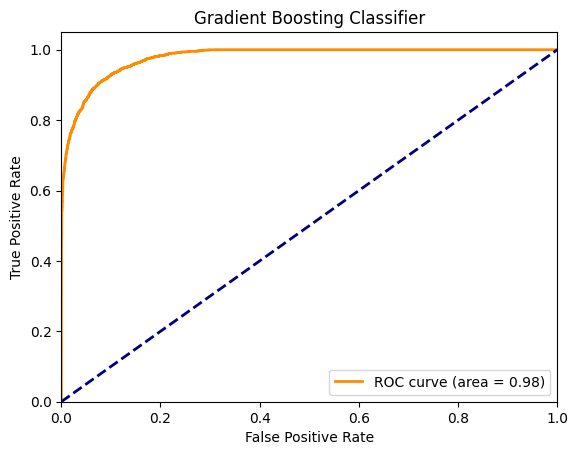

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_tests, bestmodel.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting Classifier')
plt.legend(loc='lower right')
plt.show()
